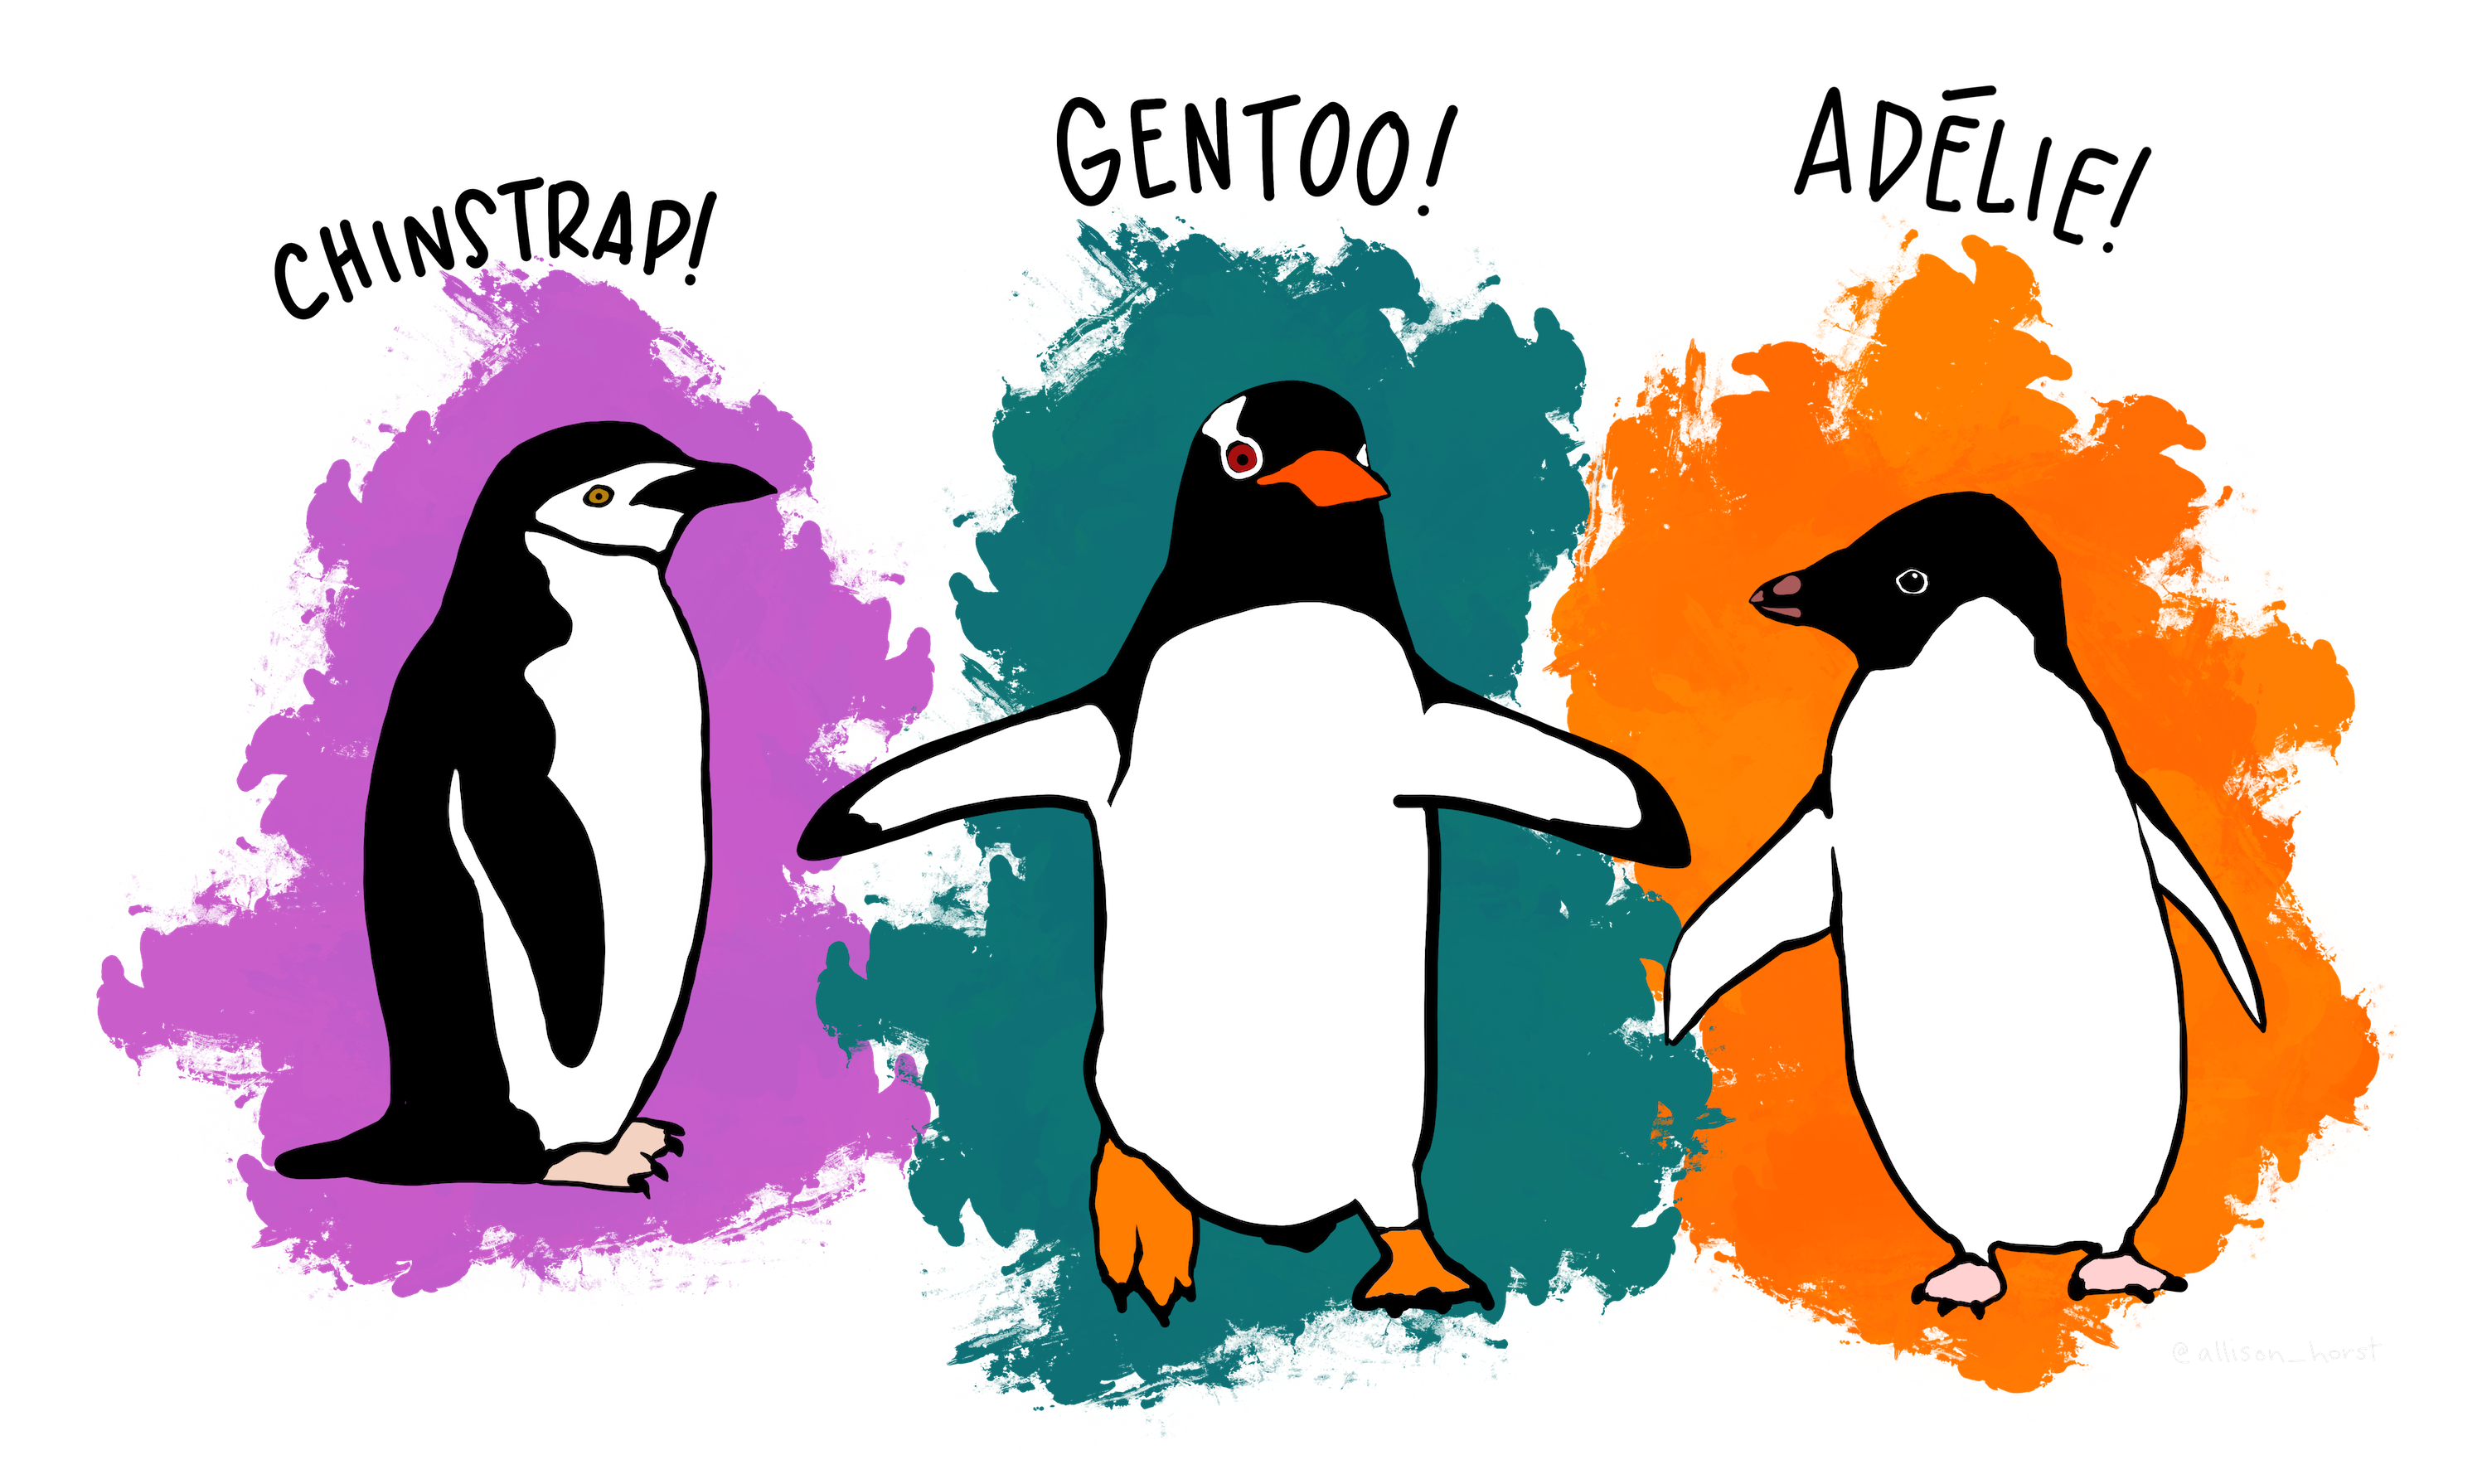

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* culmen_length_mm: culmen length (mm)
* culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* sex: penguin sex

What are culmen length & depth?
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

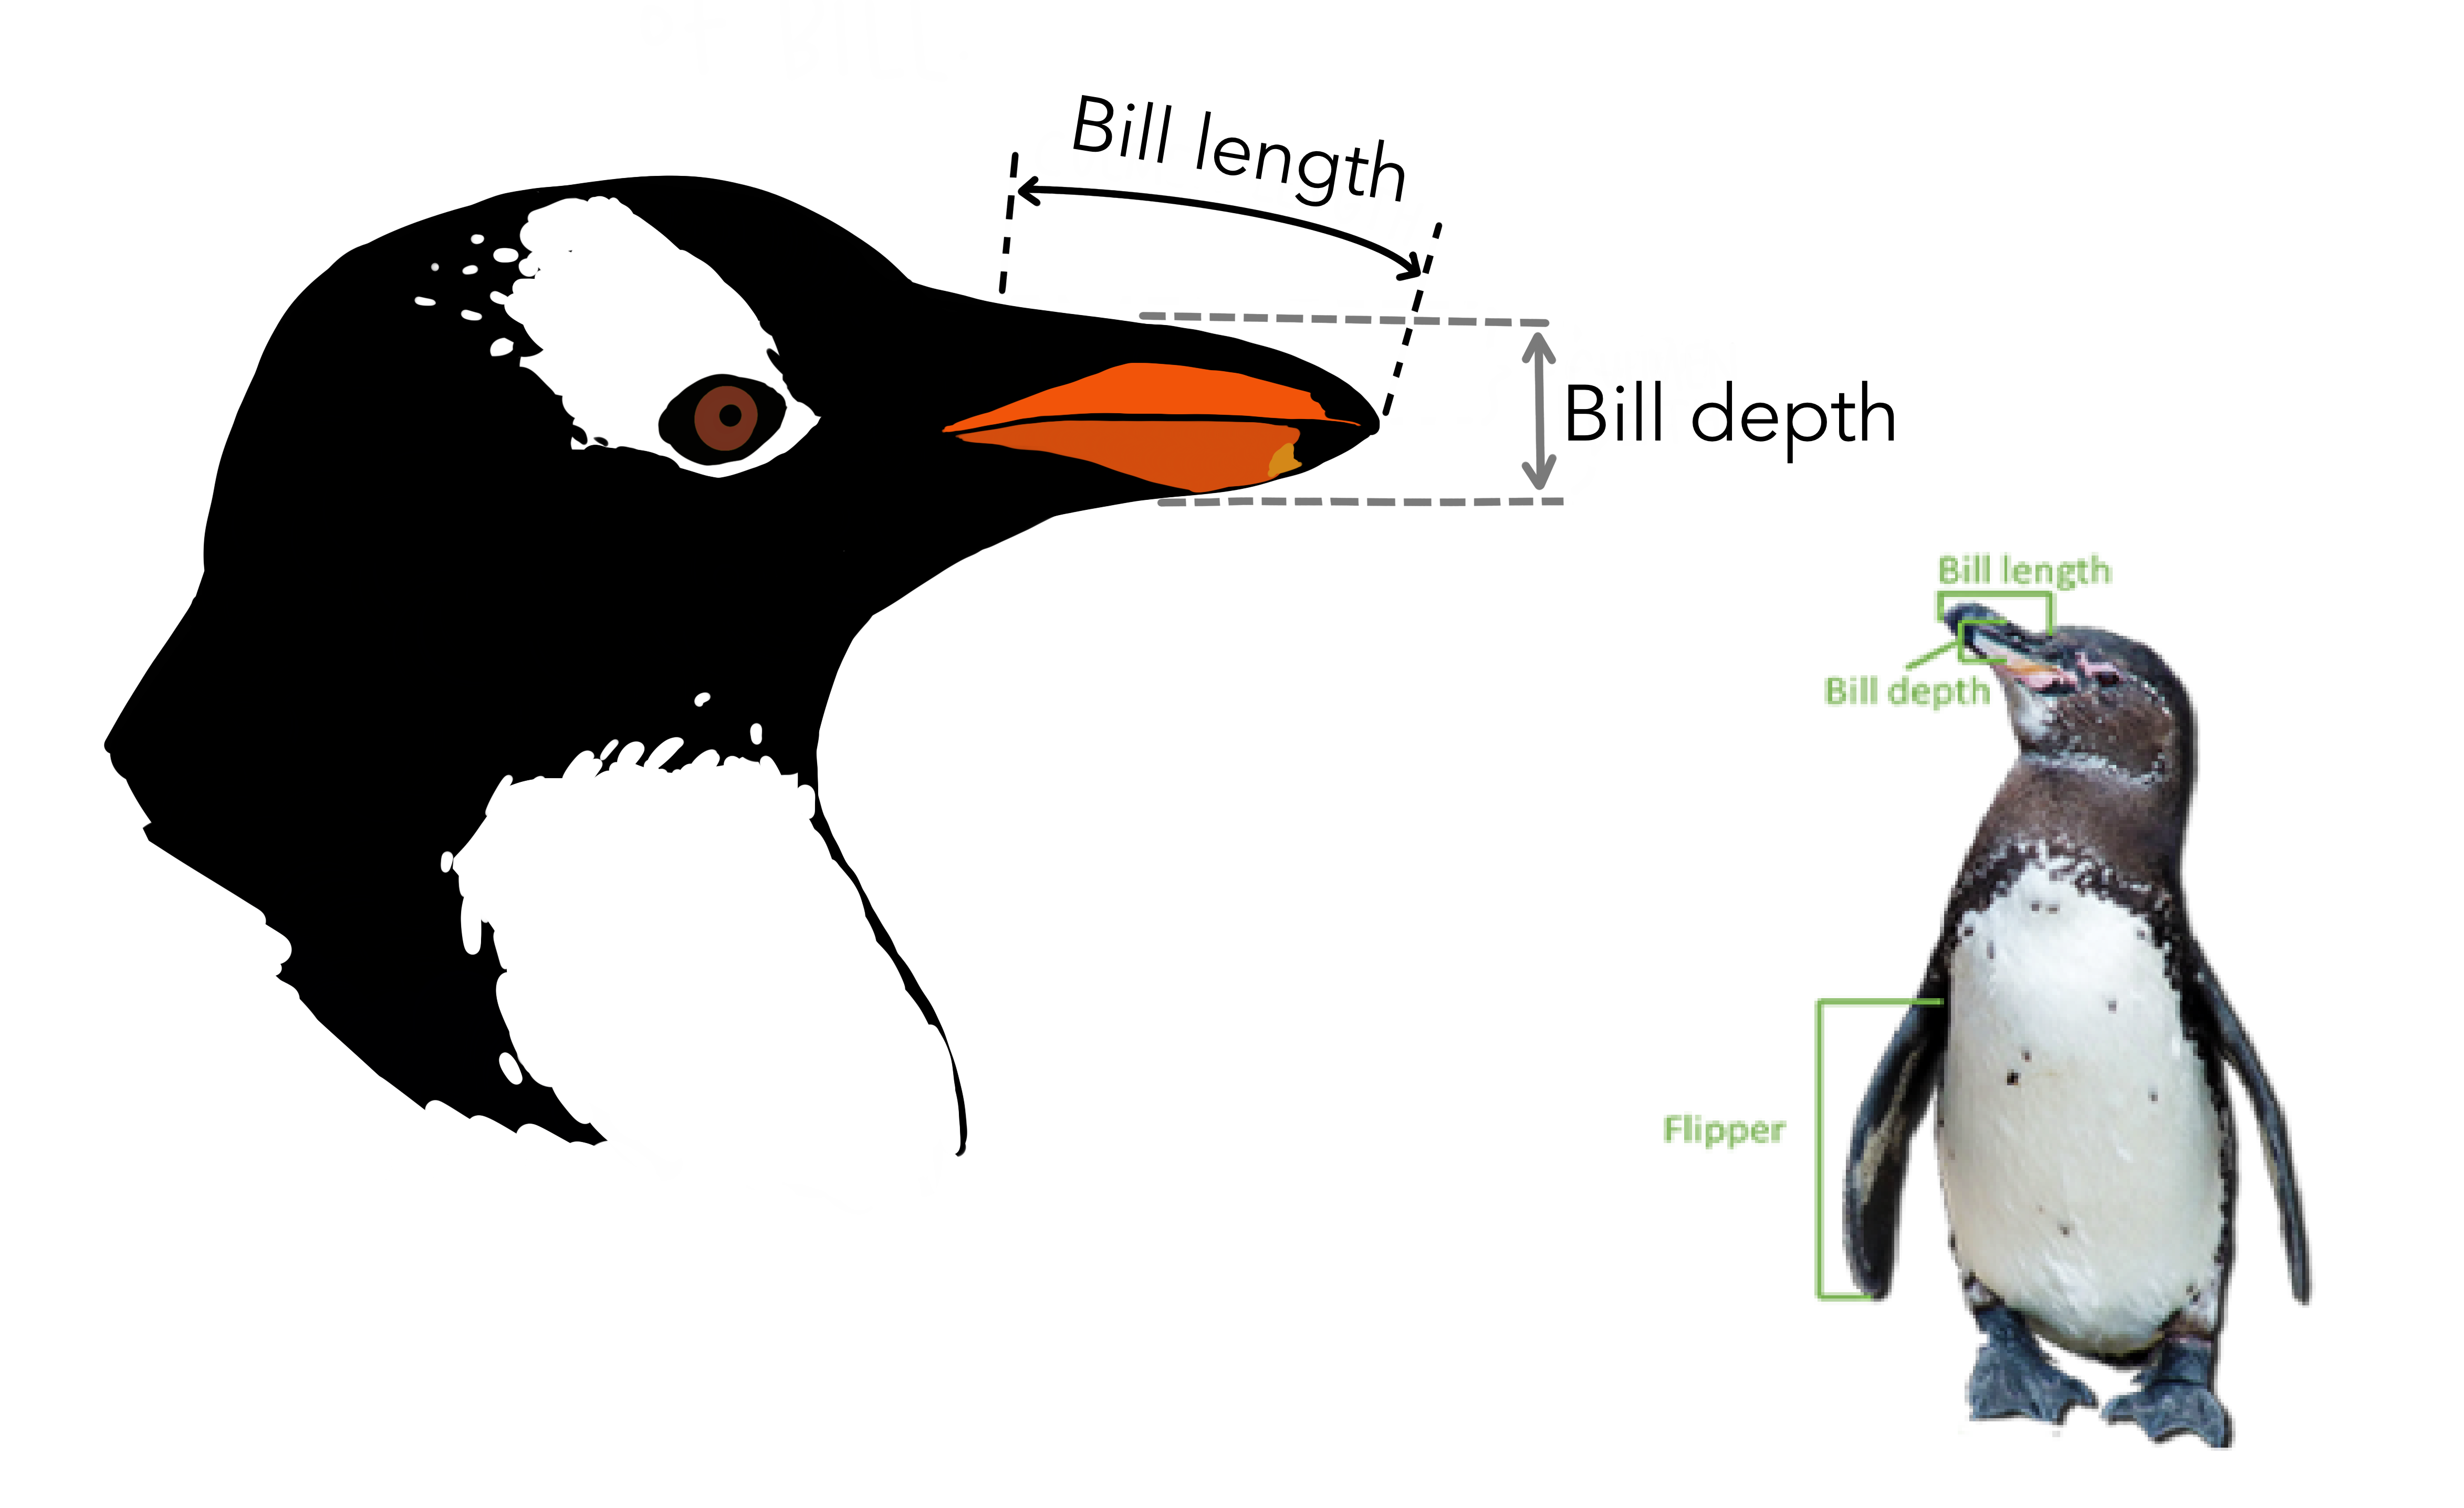

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pandas_profiling import ProfileReport

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\penguins_size.csv")

In [5]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [9]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [10]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [12]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [13]:
sex_mode = df["sex"].mode()
df[df["sex"]=="."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [14]:
df.drop(df[df["sex"]=="."].index,inplace=True)

## Checking for null values

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Checking Distribution of Numerical Plot

### Univariate Outlier Analysis

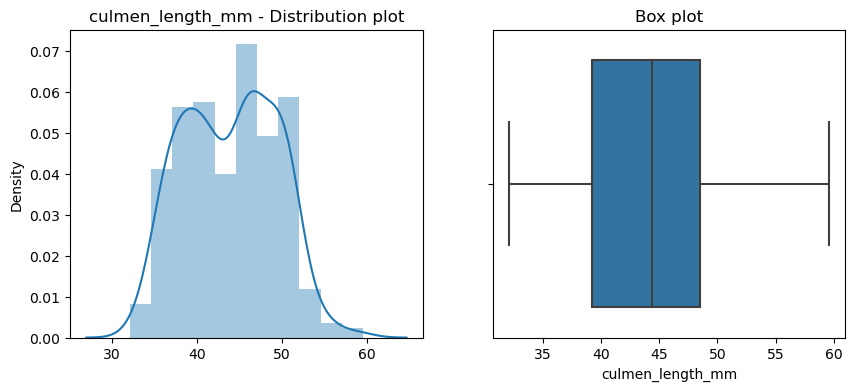

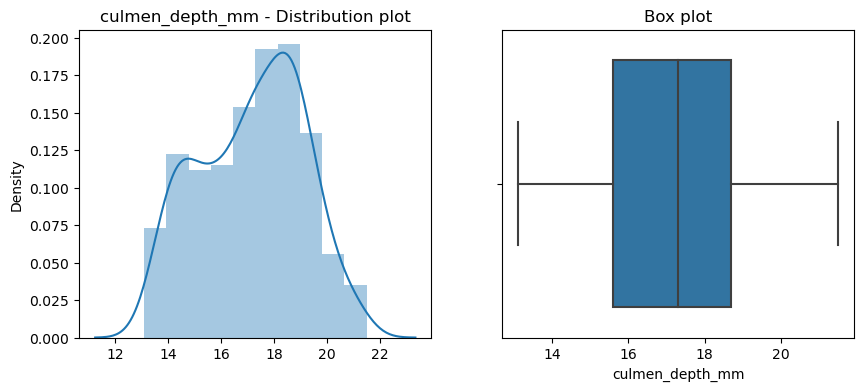

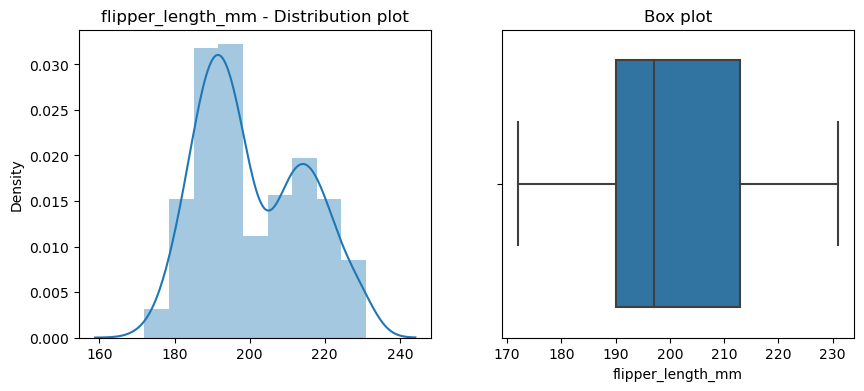

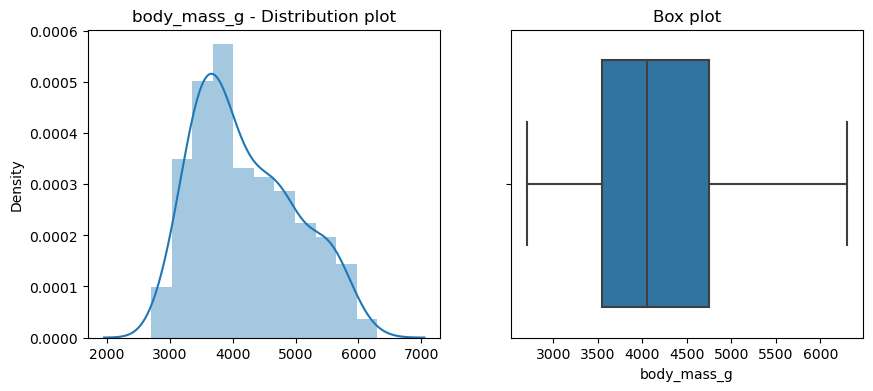

In [16]:
num_feats = df.select_dtypes("float64").columns
for col in num_feats:
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
    sns.distplot(x=df[col], ax=ax[0])
    ax[0].set_title(f"{col} - Distribution plot")
    sns.boxplot(data=df,x=col, ax=ax[1])
    ax[1].set_title("Box plot")

### Replacing numerical missing values with median

In [17]:
df_num_feat = df.select_dtypes(include=["float64","int64"])
df_num_feat.head(3)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0

In [18]:
missing_num_col = [col for col in df_num_feat.columns if df_num_feat[col].isnull().sum()>0]
missing_num_col

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [19]:
df_num_median = df_num_feat.fillna(df_num_feat.median())
df_num_median.isnull().sum().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


### Replacing Categorical missing values with mode

In [21]:
df_cat_feat = df.select_dtypes(include=["object"])
df_cat_feat.head(3)

species     island     sex
0  Adelie  Torgersen    MALE
1  Adelie  Torgersen  FEMALE
2  Adelie  Torgersen  FEMALE

In [22]:
missing_cat_col = [col for col in df_cat_feat if df_cat_feat[col].isnull().sum()>0]
missing_cat_col

['sex']

In [23]:
df["sex"].mode()

0    MALE
Name: sex, dtype: object

In [24]:
df_cat_mode = df_cat_feat.fillna(df_cat_feat.mode().iloc[0])
df_cat_mode.isnull().sum().sum()

0

In [25]:
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [26]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [27]:
df_concat = pd.concat([df[["species","island"]],
                       df_num_median[missing_num_col],
                       df_cat_mode[missing_cat_col]]
                       ,axis=1)
df_concat.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen              44.4             17.3              197.0   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3       4050.0    MALE  
4       3450.0  FEMALE

In [28]:
df_concat.isnull().sum().sum()

0

### Multivariate Analysis

#### pair Plot

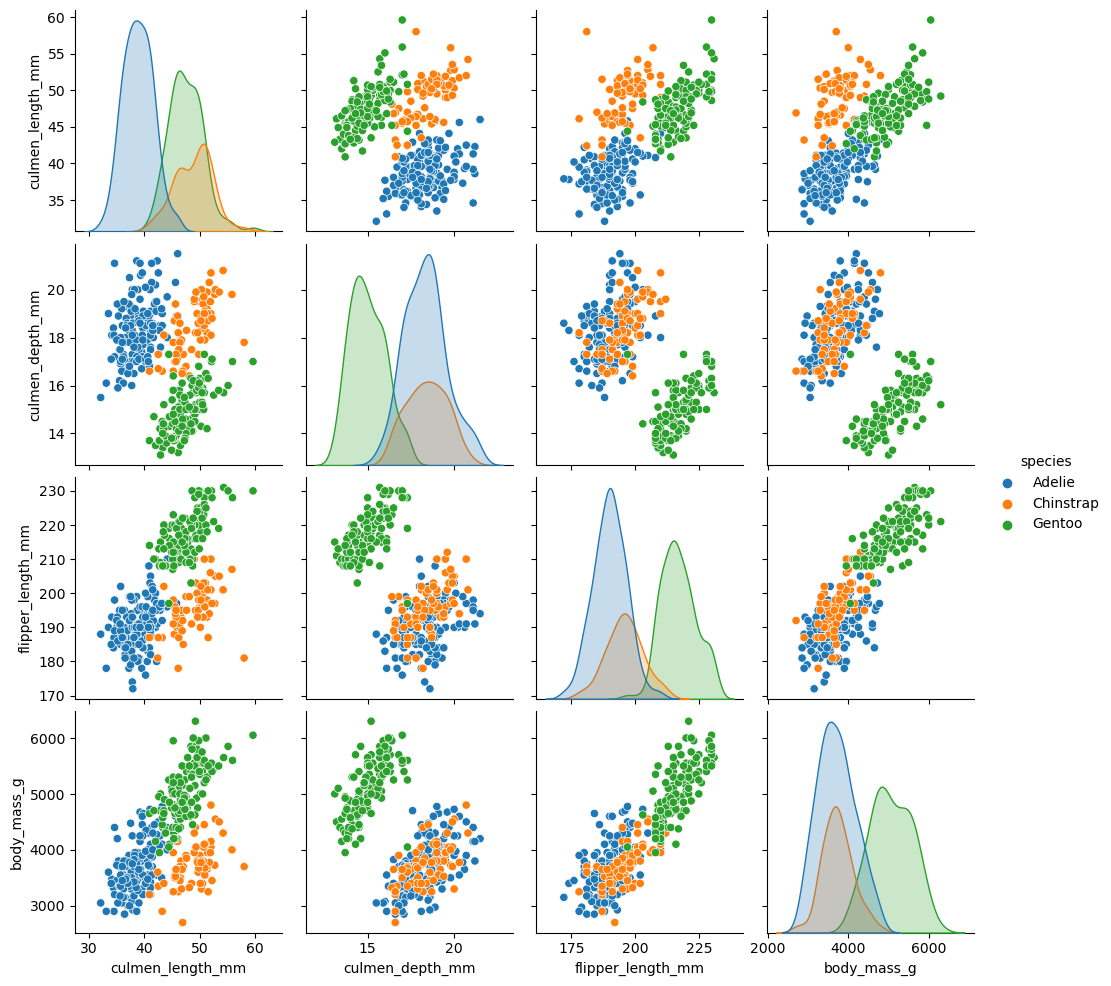

In [29]:
sns.pairplot(df_concat,hue="species")

#### Box Plot

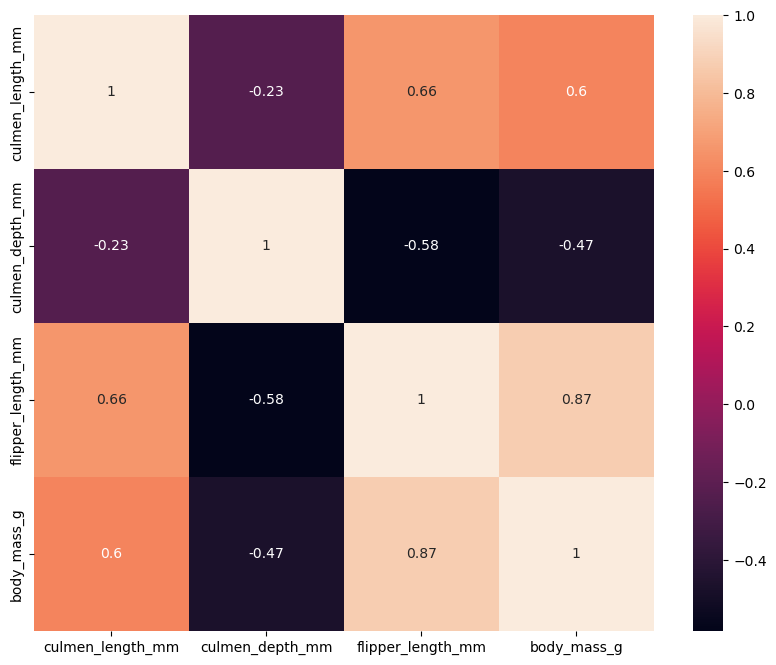

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df_concat.corr(),annot=True)
plt.show()

In [31]:
df_num_feat.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

#### Scatter Plot

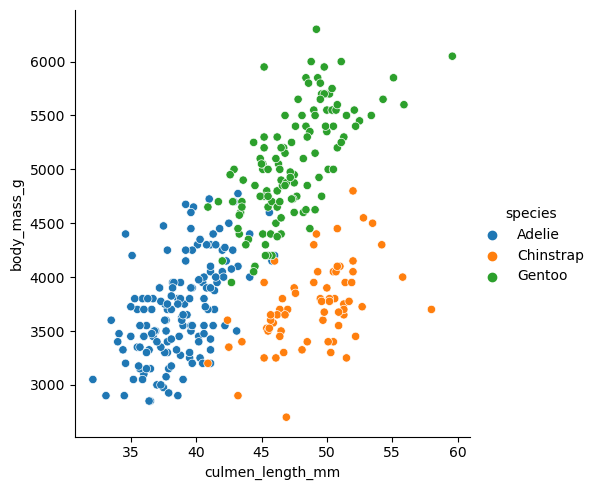

In [32]:
sns.relplot(x='culmen_length_mm', y='body_mass_g',data=df_concat,hue="species")

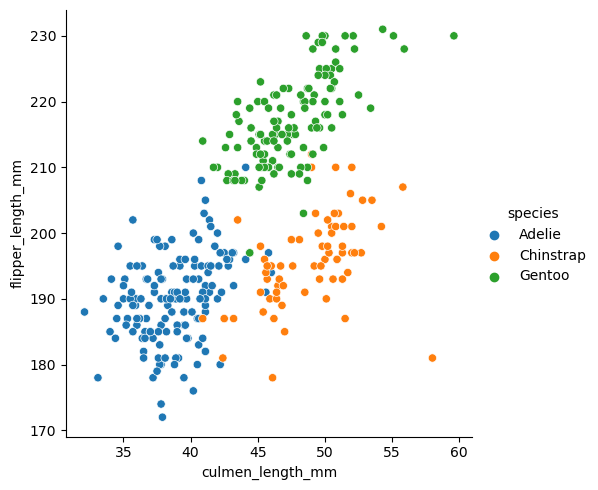

In [33]:
sns.relplot(x='culmen_length_mm', y='flipper_length_mm',data=df_concat,hue="species")

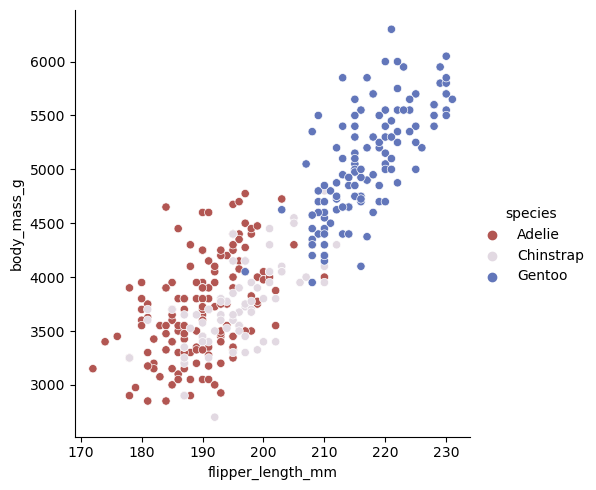

In [34]:
sns.relplot(x='flipper_length_mm', y='body_mass_g',data=df_concat,hue="species",palette="twilight_shifted_r")

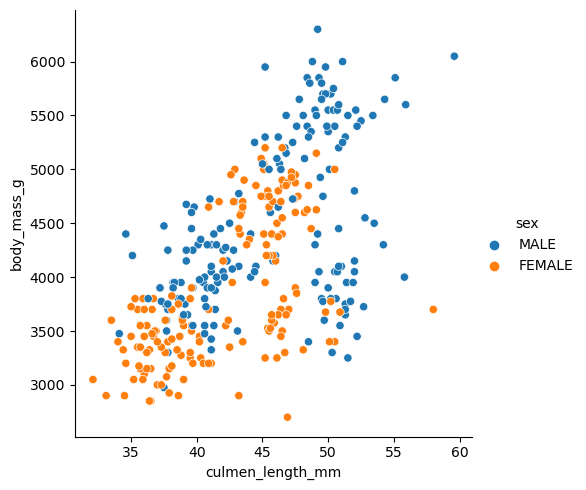

In [35]:
sns.relplot(x='culmen_length_mm', y='body_mass_g',data=df_concat,hue="sex")

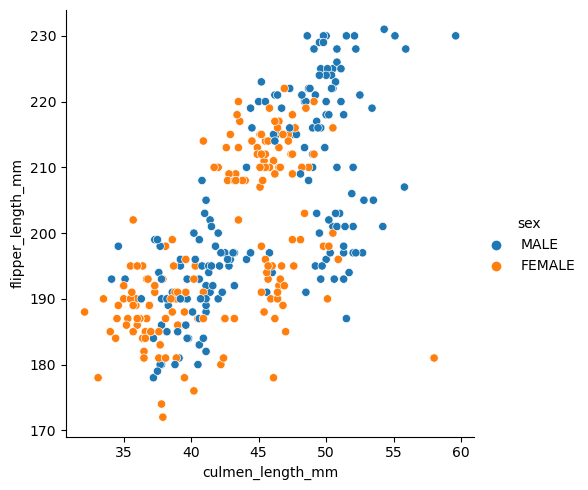

In [36]:
sns.relplot(x='culmen_length_mm', y='flipper_length_mm',data=df_concat,hue="sex")

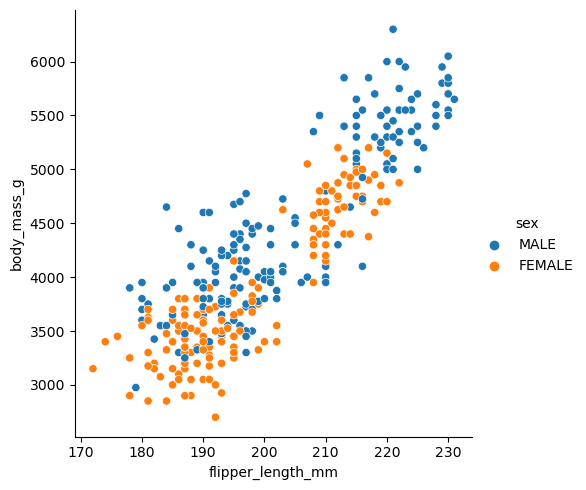

In [37]:
sns.relplot(x='flipper_length_mm', y='body_mass_g',data=df_concat,hue="sex")

In [38]:
df_concat.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen              44.4             17.3              197.0   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3       4050.0    MALE  
4       3450.0  FEMALE

In [39]:
df2 = df_concat.drop(columns='species')

In [40]:
df2.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
3  Torgersen              44.4             17.3              197.0   
4  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3       4050.0    MALE  
4       3450.0  FEMALE

In [41]:
df3 = pd.get_dummies(df2,drop_first=True)

In [42]:
df_concat["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [43]:
df_species = df_concat["species"].map({'Adelie':1,'Chinstrap':2,'Gentoo':3})
df_species = pd.DataFrame(df_species)

In [44]:
df3 = pd.concat([df3,df_species],axis=1)
df3.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
3              44.4             17.3              197.0       4050.0   
4              36.7             19.3              193.0       3450.0   

   island_Dream  island_Torgersen  sex_MALE  species  
0             0                 1         1        1  
1             0                 1         0        1  
2             0                 1         0        1  
3             0                 1         1        1  
4             0                 1         0        1

### Feature Scalling

#### Standardization

In [45]:
col_list = df3.columns

In [46]:
df3_std = (df3[col_list]-df3[col_list].mean())/df3[col_list].std()
df3_std.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.884696         0.783474          -1.415795    -0.561111   
1         -0.811323         0.123699          -1.059090    -0.498613   
2         -0.664578         0.428210          -0.417022    -1.186085   
3          0.087491         0.072947          -0.274340    -0.186126   
4         -1.324931         1.087985          -0.559704    -0.936096   

   island_Dream  island_Torgersen  sex_MALE  species  
0     -0.751372          2.362168  0.961386 -1.02548  
1     -0.751372          2.362168 -1.037132 -1.02548  
2     -0.751372          2.362168 -1.037132 -1.02548  
3     -0.751372          2.362168  0.961386 -1.02548  
4     -0.751372          2.362168 -1.037132 -1.02548

#### Min-Max Scalling

In [47]:
df3_std[col_list] = (df3_std[col_list]-df3_std[col_list].min())/(df3_std[col_list].max()-df3_std[col_list].min())
df3_std.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545         0.666667           0.152542     0.291667   
1          0.269091         0.511905           0.237288     0.305556   
2          0.298182         0.583333           0.389831     0.152778   
3          0.447273         0.500000           0.423729     0.375000   
4          0.167273         0.738095           0.355932     0.208333   

   island_Dream  island_Torgersen  sex_MALE  species  
0           0.0               1.0       1.0      0.0  
1           0.0               1.0       0.0      0.0  
2           0.0               1.0       0.0      0.0  
3           0.0               1.0       1.0      0.0  
4           0.0               1.0       0.0      0.0

In [48]:
df_backup = df3_std.copy()

In [49]:
X = df3_std.drop("species",axis=1)

In [66]:
X.head(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545         0.666667           0.152542     0.291667   
1          0.269091         0.511905           0.237288     0.305556   

   island_Dream  island_Torgersen  sex_MALE  
0           0.0               1.0       1.0  
1           0.0               1.0       0.0

In [50]:
y = df3_std["species"]

In [51]:
df3_std.shape

(343, 8)

In [52]:
X.head(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545         0.666667           0.152542     0.291667   
1          0.269091         0.511905           0.237288     0.305556   

   island_Dream  island_Torgersen  sex_MALE  
0           0.0               1.0       1.0  
1           0.0               1.0       0.0

In [53]:
y.head(2)

0    0.0
1    0.0
Name: species, dtype: float64

### Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [61]:
model.score(X_test,y_test)

0.8958518267535

In [62]:
model.coef_

array([ 0.89262262, -0.70073233,  0.49019775,  0.2643612 , -0.02876909,
       -0.0921437 , -0.08854069])

In [63]:
model.intercept_

0.13838212103860548

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_pred,y_test)

0.8881809875310045